# My Data Analysis projects _TMDb movies dataset Investigate_ .....

This data set contains information about 10,000 movies collected from The Movie Database (TMDb)



>#### **Question that can analyised from this data set**
> 1. Which genres are most popular from year to year?
> 2. What top 10 movies had highest revenue from 1960 till now?
> 3. Movies which had most and least profit?
> 4. Movies with largest and lowest budgets?
> 5. Average runtime of the movies according to year?
> 6. the total Money[budget] for the Movie in the cinema every year ?
> 7. the highest profit for Movie in The Cinema every year ?


In [2]:
# import the data analysis libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# read the TMDB_Movies data
movies_df = pd.read_csv("tmdb-movies.csv")
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


###############################################################################################################################

## Data Wrangling ....✔

In [4]:
# show the coulmns 
movies_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# showing info about dataset and dtypes for each column
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# knowing the shape of dataset
movies_df.shape

(10866, 21)

In [8]:
# info about the NULL in dataset
movies_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# And the Duplicate data
movies_df.duplicated().sum()

1

###############################################################################################################################

# DATA Cleaning ....✔

In [10]:
# Columns that we want to delete [un-nesessary ]
movies_df.drop(columns=['homepage','tagline','keywords','imdb_id','production_companies'], inplace=True)

In [11]:
# Remove Duplicate Data
movies_df.drop_duplicates(inplace=True)

In [12]:
movies_df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
overview           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [13]:
# Changing the 'release date' column into date format
movies_df['release_date'] =pd.to_datetime(movies_df.release_date)

find that there are release data greater than 2020 so we have to delete it 

In [14]:
outliers_years = movies_df[movies_df['release_date'].dt.year > 2020]

In [15]:
movies_df.drop(outliers_years.index , inplace=True)

In [16]:
# show the value of 'budget','revenue', 'runtime' equal to zero 
movies_df[movies_df.budget == 0]
movies_df[movies_df.revenue == 0]
movies_df[movies_df.runtime == 0].head(5)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,2015-12-19,11,5.4,2015,0.0,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Filmed over 14 months with unprecedented acces...,0,Documentary,2015-11-09,80,6.5,2015,0.0,0.0
410,339342,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,Six young college hopefuls vacationing and par...,0,Horror,2015-01-01,15,5.6,2015,0.0,0.0
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,Taking place years after The Haunting of Molly...,0,Horror,2015-10-09,52,5.0,2015,0.0,0.0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,2015-04-05,11,5.4,2015,0.0,0.0


In [17]:
# Be Sure that ['budget','revenue'] don't have 0
temp_list=['budget','revenue','runtime']
movies_df[temp_list] = movies_df[temp_list].replace(0, np.NAN)

In [18]:
# after replacing 0 value in ['budget', 'revenue'] to NAN
movies_df.isnull().sum()

id                   0
popularity           0
budget            5458
revenue           5736
original_title       0
cast                73
director            43
overview             4
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [19]:
# Remove NULL Data
movies_df.dropna(inplace=True)

In [20]:
movies_df.shape

(3778, 16)

## Exploratory Data Analysis

In [21]:
movies_df.rename(columns={'revenue_adj':'profit'}, inplace=True)

In [22]:
movies_df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
# movies_df["budget"].idxmin()
# movies_df.boxplot(figsize=(15,10))
# plt.show()

## Q1: What are the most popular genres year by year?

In [24]:
# Split Genres Column
genres_columns = movies_df['genres'].str.split("|",expand=True)
genres_columns = genres_columns.rename(columns = lambda x: f"genres_{x+1}")
genres_columns.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [25]:
#join the above dataframe into the dataset and drop genres column.
movies_df = movies_df.join([genres_columns])
movies_df = movies_df.drop(columns = ['genres'])
movies_df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [26]:
# locate the required data columns and mask it into genre_data
genre_data = movies_df.loc[:,['release_year','genres_1','genres_2','genres_3','genres_4','genres_5']]

genre_data.head(5)

,release_year,genres_1,genres_2,genres_3,genres_4,genres_5
0,2015,Action,Adventure,Science Fiction,Thriller,None
1,2015,Action,Adventure,Science Fiction,Thriller,None
2,2015,Adventure,Science Fiction,Thriller,None,None
3,2015,Action,Adventure,Science Fiction,Fantasy,None
4,2015,Action,Crime,Thriller,None,None


In [29]:
# extract the most genre for each year
genres_list = []
years = genre_data['release_year'].unique()
for year in years:
    # creating a mask for that each year 
    genres_year = genre_data[genre_data['release_year'] == year]
    # drop the year column from the dataframe to stack the genres columns 
    genres_year = genres_year.drop('release_year',axis=1)
    #stack the data and find the maximum occurence value of genre
    popular_genre = genres_year.stack(level=0).value_counts().idxmax() 
    
    genres_list.append((year,popular_genre))


# genres_list
sorted(genres_list, reverse=True)[:20]

[(2015, 'Drama'),
 (2014, 'Drama'),
 (2013, 'Drama'),
 (2012, 'Drama'),
 (2011, 'Drama'),
 (2010, 'Drama'),
 (2009, 'Drama'),
 (2008, 'Drama'),
 (2007, 'Drama'),
 (2006, 'Drama'),
 (2005, 'Drama'),
 (2004, 'Comedy'),
 (2003, 'Comedy'),
 (2002, 'Drama'),
 (2001, 'Comedy'),
 (2000, 'Drama'),
 (1999, 'Comedy'),
 (1998, 'Drama'),
 (1997, 'Thriller'),
 (1996, 'Drama')]

In [30]:
# gen_year = genre_data[genre_data['release_year'] == 1960]
# gen_year = gen_year.drop('release_year',axis=1)
# gen_year = gen_year.stack().value_counts().idxmax()
# gen_year

## Q2 : What top 10 movies had highest revenue from 1960 till now?

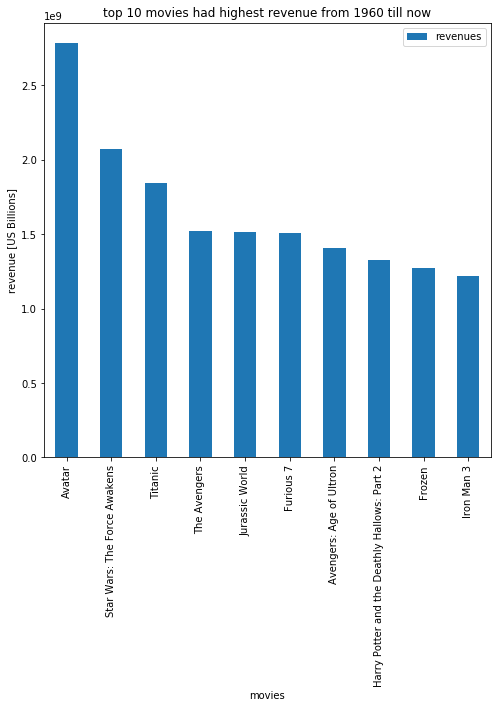

In [38]:
revenues_list = movies_df['revenue'].sort_values(ascending=False)[:10]
movies_revenues=pd.DataFrame()
movies=[]
revenues=[]
for i in revenues_list.index:
    movies.append(movies_df.loc[i,'original_title'])
    revenues.append(revenues_list.loc[i])
movies_revenues['movies']=movies
movies_revenues['revenues']=revenues
movies_revenues.set_index('movies',inplace=True)
movies_revenues.plot(kind ='bar',figsize=(8,8))
plt.title('top 10 movies had highest revenue from 1960 till now');
plt.ylabel('revenue [US Billions]');

## Q3 : Movies which had Highest and Lowest profit ?


In [39]:
# movies with highest profit 
high_profit = movies_df[movies_df.profit == movies_df.profit.max()]
high_profit

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162.0,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None


In [40]:
# movies with lowest profit 
low_profit = movies_df[movies_df.profit == movies_df.profit.min()]
low_profit

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
5067,13537,0.462609,6000000.0,2.0,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,Fact-based 2003 drama about the young journali...,94.0,2003-11-14,46,6.4,2003,7.112116e+06,2.370705,Drama,History,None,None,None


## Q4 : Movies with largest and lowest budgets?


In [41]:
# movies with highest budget 
high_budget = movies_df[movies_df.budget == movies_df.budget.max()]
high_budget

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
2244,46528,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100.0,2010-12-02,74,6.4,2010,425000000.0,11087569.0,Adventure,Fantasy,Action,Western,Thriller


In [42]:
# movies with lowest budget 
low_budget = movies_df[movies_df.budget == movies_df.budget.min()]
low_budget

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
2618,39964,0.090186,1.0,100.0,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,A comedy about finding your true love at any p...,95.0,1999-04-23,14,4.8,1999,1.309053,130.905285,Comedy,Romance,None,None,None
3581,59296,0.520430,1.0,1378.0,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,A happy newlywed marriage counselor's views on...,90.0,2011-06-03,55,5.3,2011,0.969398,1335.830503,Comedy,Romance,None,None,None


##  Q5 : Average runtime of the movies according to year?

In [43]:
AVG_Runtime = movies_df.groupby("release_year")["runtime"].mean()
AVG_Runtime.head(10)

release_year
1970    121.454545
1971    112.615385
1972    113.000000
1973    111.916667
1974    122.000000
1975    119.333333
1976    118.333333
1977    108.789474
1978    122.882353
1979    115.437500
Name: runtime, dtype: float64

## Q6 : the total Money[budget] for the Movie in the cinema every year ?

In [44]:
sum_budget = movies_df.groupby("release_year")["budget"].sum()
sum_budget.head(10)

release_year
1970     95901946.0
1971     40002000.0
1972     23664254.0
1973     57327000.0
1974     69585000.0
1975     37100000.0
1976    120500000.0
1977    138850000.0
1978    166170011.0
1979    230700000.0
Name: budget, dtype: float64

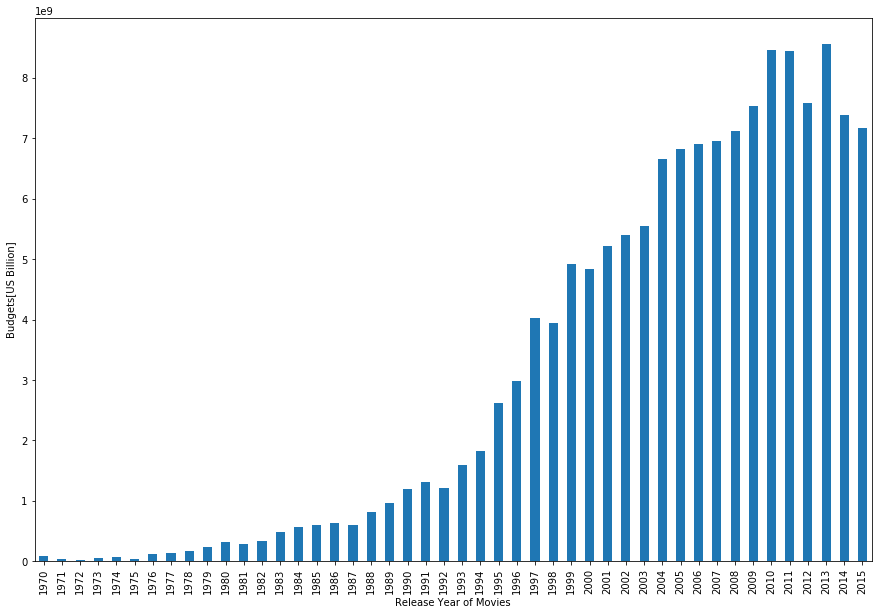

In [45]:
sum_budget.plot(kind="bar", figsize=(15,10))
plt.xlabel('Release Year of Movies')
plt.ylabel('Budgets[US Billion]')
plt.show()

## Q7: the highest profit for Movie in The Cinema every year ?

In [46]:
highest_profit = movies_df.groupby("release_year")["profit"].idxmax()
movies_df.loc[highest_profit]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,profit,genres_1,genres_2,genres_3,genres_4,genres_5
10654,9062,0.396028,2200000.0,1.364000e+08,Love Story,Ali MacGraw|Ryan O'Neal|John Marley|Ray Millan...,Arthur Hiller,Harvard Law student Oliver Barrett IV and musi...,99.0,1970-12-16,56,6.6,1970,1.235601e+07,7.660726e+08,Drama,Romance,None,None,None
9925,681,1.755117,7200000.0,1.160000e+08,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,Guy Hamilton,Diamonds are stolen only to be sold again in t...,120.0,1971-12-13,331,6.2,1971,3.877340e+07,6.246826e+08,Adventure,Action,Thriller,Science Fiction,None
7269,238,5.738034,6000000.0,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175.0,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09,Drama,Crime,None,None,None
10594,9552,2.010733,8000000.0,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,12-year-old Regan MacNeil begins to adapt an e...,122.0,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09,Drama,Horror,Thriller,None,None
9767,11072,0.577802,2600000.0,1.195000e+08,Blazing Saddles,Cleavon Little|Gene Wilder|Harvey Korman|Slim ...,Mel Brooks,A town â€“ where everyone seems to be named Jo...,93.0,1974-02-07,334,7.0,1974,1.149794e+07,5.284629e+08,Comedy,Western,None,None,None
9806,578,2.563191,7000000.0,4.706540e+08,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,An insatiable great white shark terrorizes the...,124.0,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09,Horror,Thriller,Adventure,None,None
10208,19610,0.155768,6000000.0,1.610000e+08,A Star Is Born,Barbra Streisand|Kris Kristofferson|Gary Busey...,Frank Pierson,A Star Is Born is a 1976 rock music film telli...,139.0,1976-12-16,14,5.7,1976,2.299019e+07,6.169034e+08,Drama,Music,Romance,None,None
1329,11,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121.0,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure,Action,Science Fiction,None,None
10758,1924,1.210324,55000000.0,3.002180e+08,Superman,Marlon Brando|Gene Hackman|Christopher Reeve|N...,Richard Donner,Mild-mannered Clark Kent works as a reporter a...,143.0,1978-12-14,518,6.7,1978,1.838485e+08,1.003539e+09,Adventure,Fantasy,Action,Science Fiction,None
7829,698,1.691143,34000000.0,2.103000e+08,Moonraker,Roger Moore|Lois Chiles|Michael Lonsdale|Corin...,Lewis Gilbert,During the transportation of a Space Shuttle a...,126.0,1979-06-26,299,5.7,1979,1.021548e+08,6.318577e+08,Action,Adventure,Thriller,Science Fiction,None


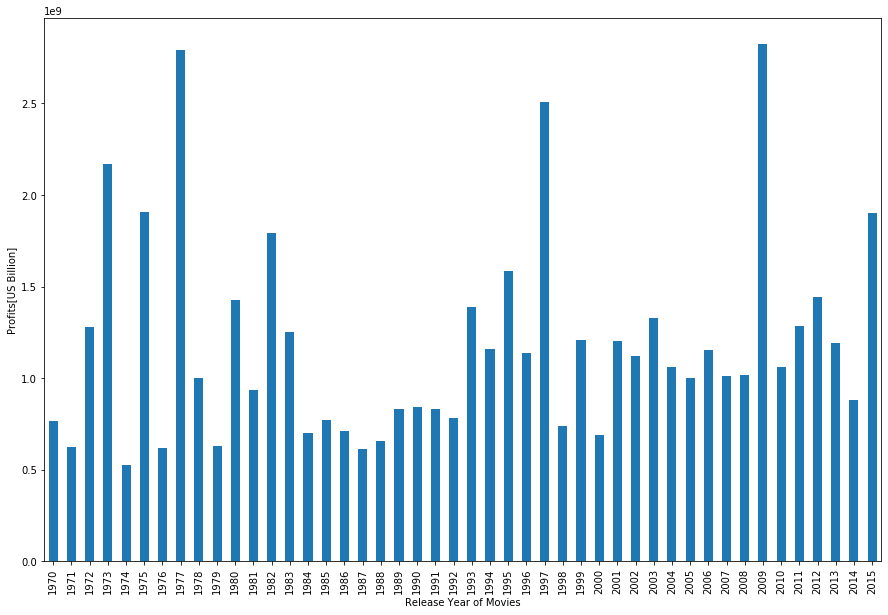

In [47]:
movies_df.groupby("release_year")["profit"].max().plot(kind="bar", figsize=(15,10))
plt.xlabel('Release Year of Movies')
plt.ylabel('Profits[US Billion]')
plt.show()